In [1]:
import lang2vec.lang2vec as l2v
import pandas as pd
from langcodes import *
import numpy as np
from tqdm.auto import tqdm

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [23]:
lang = pd.read_csv("tl_lang.csv")
res = pd.read_csv("tl_results_june.csv").set_index("hr_lang")

tokens = pd.read_csv("Downloads/Telegram Desktop/token_ration.csv").set_index("hr_lang")

In [15]:
langs = pd.DataFrame(['Abaza',
 'Adyghe (Shapsugh)',
 'Afrikaans',
 'Akan',
 'Albanian',
 'Altai (Southern)',
 'Apurinã',
 'Arabic (Lebanese)',
 'Arabic (Modern Standard)',
 'Arabic (Moroccan)',
 'Archi',
 'Armenian (Eastern)',
 'Armenian (Iranian)',
 'Armenian (Western)',
 'Assamese',
 'Asturian',
 'Atayal',
 'Atikamekw',
 'Avar',
 'Azerbaijani',
 'Balinese',
 'Bambara',
 'Bashkir',
 'Basque',
 'Beja',
 'Belorussian',
 'Bengali',
 'Bhojpuri',
 'Bikol',
 'Breton',
 'Bulgarian',
 'Buriat',
 'Burmese',
 'Cantonese',
 'Catalan',
 'Chechen',
 'Chichewa',
 'Chukchi',
 'Chuvash',
 'Coptic',
 'Cornish',
 'Czech',
 'Dagbani',
 'Danish',
 'Dargwa',
 'Dhivehi',
 'Dogri',
 'Dutch',
 'Dutch (Zeeuws)',
 'English',
 'Estonian',
 'Even',
 'Faroese',
 'Finnish',
 'French',
 'Frisian',
 'Frisian (Western)',
 'Gaelic (Scots)',
 'Galician',
 'Georgian',
 'German',
 'German (Ripuarian)',
 'German (Timisoara)',
 'German (Viennese)',
 'German (Zurich)',
 'Greek (Modern)',
 'Greenlandic (South)',
 'Guajajara',
 'Guaraní',
 'Guianese French Creole',
 'Gujarati',
 'Hausa',
 'Hawaiian',
 'Hebrew (Modern)',
 'Hindi',
 'Hungarian',
 'Icelandic',
 'Igbo',
 'Indonesian',
 'Indonesian (Jakarta)',
 'Ingush',
 'Irish',
 'Irish (Munster)',
 'Italian',
 'Italian (Genoa)',
 'Itelmen',
 'Japanese',
 'Javanese',
 'Kabardian',
 'Kabiyé',
 'Kannada',
 'Karachay-Balkar',
 'Karakalpak',
 'Karelian',
 'Kashmiri',
 'Kazakh',
 'Khakas',
 'Khanty',
 'Khmer',
 'Kinyarwanda',
 'Kirghiz',
 'Komi-Permyak',
 'Komi-Zyrian',
 'Koryak',
 'Kumyk',
 'Kurdish (Central)',
 'Kurmanji',
 'Ladin',
 'Ladino',
 'Lak',
 'Lao',
 'Latvian',
 'Lezgian',
 'Lithuanian',
 'Liv',
 'Low German',
 'Luganda',
 'Luxemburgeois',
 'Macedonian',
 'Madurese',
 'Malay',
 'Malayalam',
 'Maltese',
 'Mansi',
 'Manx',
 'Marathi',
 'Mari (Meadow)',
 'Mingrelian',
 'Mon',
 'Mongol (Khamnigan)',
 'Mordvin (Erzya)',
 'Mordvin (Moksha)',
 'Mundurukú',
 'Nanai',
 'Nenets (Tundra)',
 'Neo-Aramaic (Assyrian)',
 'Nepali',
 'Newar (Dolakha)',
 'Nias',
 'Nivkh (South Sakhalin)',
 'Norwegian',
 'Oirat',
 'Oriya',
 'Panjabi',
 'Papiamentu',
 'Polish',
 'Portuguese',
 'Provençal',
 'Quiché',
 'Romani (Lovari)',
 'Romanian',
 'Romansch (Sursilvan)',
 'Rundi',
 'Russian',
 'Rutul',
 'Saami (Northern)',
 'Samoan',
 'Santali',
 'Sardinian',
 'Seediq',
 'Sesotho',
 'Shan',
 'Shor',
 'Sindhi',
 'Sinhala',
 'Slovak',
 'Slovene',
 'Slovincian',
 'Solon',
 'Somali',
 'Sorbian (Lower)',
 'Sorbian (Upper)',
 'Spanish',
 'Sranan',
 'Sundanese',
 'Swahili',
 'Swati',
 'Swedish',
 'Tabassaran',
 'Tamil',
 'Tamil (Spoken)',
 'Tashlhiyt',
 'Tat (Muslim)',
 'Tatar',
 'Telugu',
 'Tetun',
 'Thai',
 'Tibetan (Modern Literary)',
 'Tofa',
 'Tsakhur',
 'Tsonga',
 'Tswana',
 'Tulu',
 'Tupi',
 'Turkish',
 'Turkmen',
 'Tuvan',
 'Udi',
 'Udmurt',
 'Ukrainian',
 'Urubú-Kaapor',
 'Uyghur',
 'Veps',
 'Vietnamese',
 'Warlpiri',
 'Welsh',
 'Wolof',
 'Xhosa',
 'Yakut',
 'Yazva',
 'Yiddish (Lithuanian)',
 'Yukaghir (Kolyma)',
 'Yukaghir (Tundra)',
 "Yup'ik (Central)",
 'Yurt Tatar'], columns=["Language"])

In [16]:
res_cols = [x for x in res.columns if x in langs.iloc[:,0].to_list()]

In [17]:
res = res[res_cols]

In [18]:
drop_rows = [x for x in res.index if x not in langs.iloc[:,0].to_list()]

In [19]:
res = res.drop(drop_rows)

In [40]:
corr_list = [(res.loc[language][lang], ratio) for language, langs in tokens.to_dict(orient="index").items() for lang, ratio in langs.items() if not np.isnan(res.loc[language][lang])]

In [43]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

pearsonr(*list(zip(*corr_list)))

PearsonRResult(statistic=-0.3380461569855396, pvalue=1.588817697527112e-130)

In [56]:
import seaborn as sns

res, corr = list(zip(*corr_list))

In [59]:
import lingtypology

In [67]:
langs["family"] = langs.Language.apply(lambda x: lingtypology.glottolog.get_affiliations([x.split()[0]])[0].split(",")[0])

(get_affiliations) Warning: affiliation for Altai not found
(get_affiliations) Warning: affiliation for Armenian not found
(get_affiliations) Warning: affiliation for Armenian not found
(get_affiliations) Warning: affiliation for Armenian not found
(get_affiliations) Warning: affiliation for Azerbaijani not found
(get_affiliations) Warning: affiliation for Belorussian not found
(get_affiliations) Warning: affiliation for Chichewa not found
(get_affiliations) Warning: affiliation for Dargwa not found
(get_affiliations) Warning: affiliation for Gaelic not found
(get_affiliations) Warning: affiliation for Greenlandic not found
(get_affiliations) Warning: affiliation for Guajajara not found
(get_affiliations) Warning: affiliation for Guaraní not found
(get_affiliations) Warning: affiliation for Guianese not found
(get_affiliations) Warning: affiliation for Hebrew not found
(get_affiliations) Warning: affiliation for Itelmen not found
(get_affiliations) Warning: affiliation for Karakalpak n

In [68]:
langs

,Language,family
0,Abaza,Abkhaz-Adyge
1,Adyghe (Shapsugh),Abkhaz-Adyge
2,Afrikaans,Indo-European
3,Akan,Atlantic-Congo
4,Albanian,Indo-European
...,...,...
210,Yiddish (Lithuanian),Indo-European
211,Yukaghir (Kolyma),
212,Yukaghir (Tundra),
213,Yup'ik (Central),


In [62]:
lingtypology.glottolog.get_affiliations(["Russian", "English"])

['Indo-European, Balto-Slavic, Slavic, East Slavic',
 'Indo-European, Germanic, Northwest Germanic, West Germanic, North Sea Germanic, Anglo-Frisian, Anglic, Later Anglic, Middle-Modern English, Macro-English']

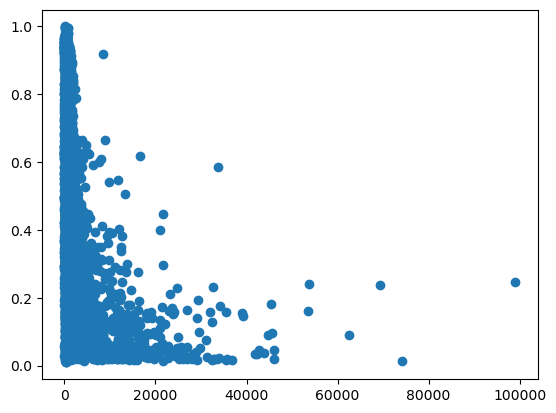

In [58]:
plt.scatter(res, corr)

In [ ]:
lang = pd.merge(langs, lang, on="Language", how="left")

In [ ]:
def get_iso(lang):
    try:
        return Language.find(lang).to_alpha3()
    except:
        return ""

In [ ]:
lang["iso"] = lang["Language"].apply(get_iso)
#lang.to_csv("tl_lang.csv")

In [ ]:
feat_len = len(list(l2v.get_features("eng", "syntax_wals").values())[0])

In [4]:
def get_feats(lang):
    if lang in l2v.LANGUAGES:
        return list(l2v.get_features(lang, "syntax_wals").values())[0]
    else:
        return ["--"] * feat_len

Sets from feature and inventory databases:

"syntax_wals",
"phonology_wals",
"syntax_sswl",
"syntax_ethnologue",
"phonology_ethnologue",
"inventory_ethnologue",
"inventory_phoible_aa",
"inventory_phoible_gm",
"inventory_phoible_saphon",
"inventory_phoible_spa",
"inventory_phoible_ph",
"inventory_phoible_ra",
"inventory_phoible_upsid",
Averages of sets:

"syntax_average",
"phonology_average",
"inventory_average",
KNN predictions of feature values:

"syntax_knn",
"phonology_knn",
"inventory_knn",
Membership in language families and subfamilies:

"fam",
Distance from fixed points on Earth's surface

"geo",
Learned vector used for typological predictions in Malaviya et al.

"learned",
One-hot identity vector:

"id",

In [195]:
lang["feat"] = lang["iso"].apply(get_feats)

In [217]:
lr_lang = list(res.iloc[0].index)
hr_lang = list(res.index)
X_pairs = {}

In [214]:
len(hr_lang)

158

In [219]:
158 * 31

4898

In [197]:
zero_shot = {'Akan': [33.07, 'Swahili', 'Lao'],
             'Atikamekw': [61.72, '_', 'Asturian'],
             'Bambara': [51.67, '_', 'Navajo'],
             'Bhojpuri': [31.27, 'Hindi', 'Tulu'],
             'Bislama': [32.15, 'Papiamentu', 'Frisian (North)'],
             'Cantonese': [58.27, 'Mandarin', 'Bulgarian'],
             'Chamorro': [32.87, 'Cebuano', 'Tagalog'],
             'Cherokee': [7.67, '_', 'Minangkabau'],
             'Cheyenne': [28.52, '_', 'Asturian'],
             'Chichewa': [13.72, 'Swahili', 'Malgwa'],
             'Coptic': [4.72, 'Hebrew (Modern)', 'Sundanese'],
             'Dagbani': [47.81, 'Kabiyé', 'Sotho (Northern)'],
             'Ewe': [28.88, 'Swahili', 'Latvian'],
             'Greenlandic (South)': [35.55, '_', 'Mingrelian'],
             'Guaraní': [3.99, '_', 'Hausa'],
             'Kashmiri': [26.27, 'Hindi', 'Malgwa'],
             'Kikuyu': [38.81, 'Swahili', 'Xhosa'],
             'Komi-Zyrian': [110.02, 'Yazva', 'Kabiyé'],
             'Kongo': [26.46, 'Swahili', 'Aymara (Central)'],
             'Koryak': [88.66, 'Chukchi', 'Tulu'],
             'Kurmanji': [32.44, 'Persian', 'Afrikaans'],
             'Madurese': [33.61, 'Indonesian (Jakarta)', 'Frisian (Western)'],
             'Nadroga': [34.94, 'Maori', 'Seediq'],
             'Nanai': [72.91, 'Solon', 'Papiamentu'],
             'Nauruan': [42.17, 'Maori', 'Shan'],
             'Quiché': [165.78, '_', 'Asturian'],
             'Romani (Lovari)': [25.10, 'Hindi', 'Asturian'],
             'Rundi': [21.92, 'Swahili', 'Waray-Waray'],
             'Samoan': [12.52, 'Maori', 'Tongan'],
             'Sango': [23.20, 'Swahili', 'Hausa'],
             'Sesotho': [12.77, 'Swahili', 'Kabiyé'],
             'Shor': [167.74, 'Chuvash', 'Altai (Southern)'],
             'Sranan': [35.44, 'Papiamentu', 'Papiamentu'],
             'Swati': [40.65, 'Swahili', 'Belorussian'],
             'Tabassaran': [57.19, 'Lezgian', 'Jamaican (Creole)'],
             'Tahitian': [22.08, 'Maori', 'Tongan'],
             'Tat (Muslim)': [70.32, 'Persian', 'Jamaican (Creole)'],
             'Tigrinya': [13.88, 'Hebrew (Modern)', 'Tulu'],
             'Tofa': [62.38, 'Chuvash', 'Jamaican (Creole)'],
             'Tok Pisin': [30.81, 'Papiamentu', 'Afrikaans'],
             'Tsakhur': [41.74, 'Lezgian', 'Ladino'],
             'Tsonga': [40.41, 'Swahili', 'Asturian'],
             'Udi': [55.01, 'Lezgian', 'Tulu'],
             'Venda': [31.95, 'Swahili', 'Kabiyé'],
             'Yukaghir (Kolyma)': [104.80, '_', 'Kannada'],
             'Zhuang (Northern)': [26.43, 'Thai', 'Bikol']
            }

In [198]:
def get_zero_shot(value, zero_shot, low_res):
    if zero_shot[low_res][0] > value:
        return 1
    else:
        return 0

In [199]:
def compare_lists(l1, l2):
    return [l1[i] == l2[i] if l1[i] != "--" and l2[i] !="--" else False for i in range(len(l1))]

In [200]:
for high_res in tqdm(hr_lang):
    if high_res in lang["Language"].to_list():
        l1 = lang[lang["Language"]==high_res]["feat"].to_list()[0]
        for low_res in lr_lang:
            l2 = lang[lang["Language"]==low_res]["feat"].to_list()
            if l2:
                l2 = l2[0]
            value = res[res.index == high_res][low_res].values[0]
            if not np.isnan(value):
                X_pairs[(low_res, high_res)] = (compare_lists(l1, l2), get_zero_shot(value, zero_shot, low_res)) 
    else:
        print(high_res)

  0%|          | 0/158 [00:00<?, ?it/s]

In [201]:
lang

,Language,Unnamed: 0,HR,iso,syntax,feat
0,Abaza,0.0,1,abq,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
1,Adyghe (Shapsugh),2.0,1,ady,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,Afrikaans,3.0,1,afr,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
3,Akan,4.0,0,aka,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
4,Albanian,5.0,1,sqi,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
...,...,...,...,...,...,...
210,Yiddish (Lithuanian),277.0,1,yid,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
211,Yukaghir (Kolyma),279.0,0,,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
212,Yukaghir (Tundra),280.0,1,,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
213,Yup'ik (Central),281.0,1,esu,"['--', '--', '--', '--', '--', '--', 1.0, 1.0,...","[--, --, --, --, --, --, 1.0, 1.0, 1.0, 1.0, -..."


In [202]:
X, y = zip(*list(X_pairs.values()))
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
model = LogisticRegression()

In [204]:
model.fit(X, y)

LogisticRegression()

In [205]:
len(X_pairs)

4714

In [206]:
names = l2v.get_features("eng", "syntax_wals", header=True)["CODE"]

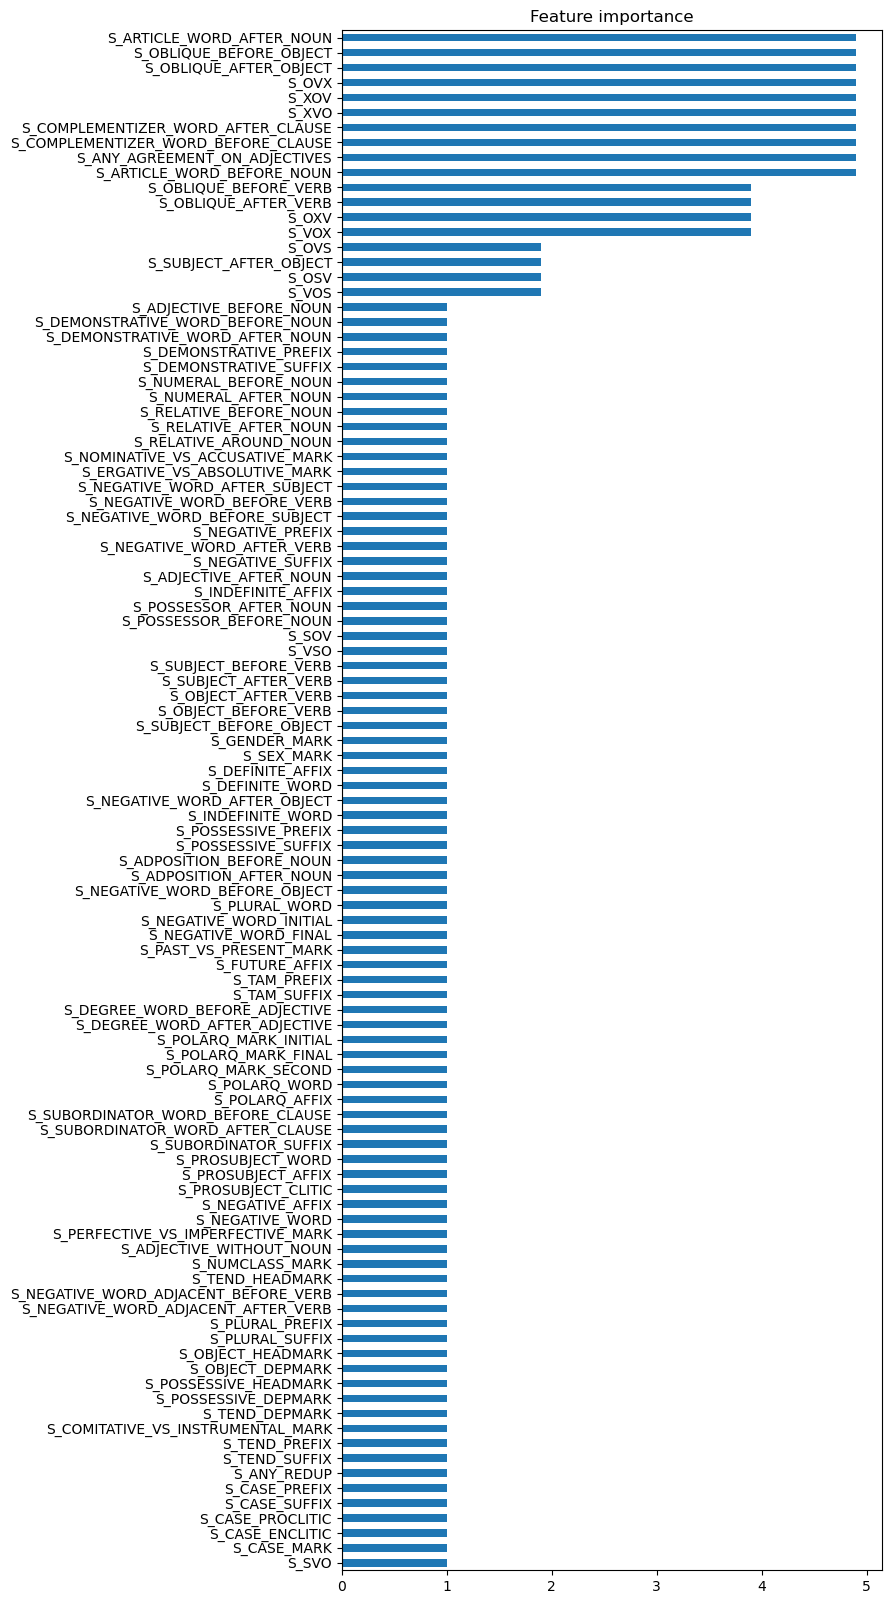

In [207]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    model.coef_[0], columns=["Coefficients"], index=names
)

coefs["Coefficients"] = coefs.Coefficients.fillna(0.0)
norm = coefs.Coefficients.value_counts(normalize=True).mul(100).round(1).to_dict()
coefs["percentage"] = coefs.Coefficients.apply(lambda x: norm[x])
coefs = coefs.sort_values("percentage")
coefs["percentage"].plot(kind="barh", figsize=(9, 20))
plt.title("Feature importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [208]:
lang["num_nan"] = lang["feat"].apply(lambda x: x.count("--"))

In [210]:
y_pred = model.predict(X_test)

In [211]:
r2_score(y_test, y_pred)

-0.009417808219178259

In [212]:
accuracy_score(y_test, y_pred)

0.9906700593723494